In [14]:
import pandas as pd

In [20]:
df = pd.read_pickle('test.csv')

In [21]:
df

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,trend
2000-11-20 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,1,[],0.0,NaN
2000-11-21 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,2,[],0.0,NaN
2000-11-22 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,3,[],0.0,NaN
2000-11-24 18:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,4,[],0.0,NaN
2000-11-27 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,5,[],0.0,NaN
2000-11-28 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,6,[],0.0,NaN
2000-11-29 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,7,[],0.0,NaN
2000-11-30 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,8,[],0.0,NaN
2000-12-01 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,9,[],0.0,NaN
2000-12-04 21:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.000000,10000.000000,0.00,0.00,...,0.00,0,NaN,10000.000000,0.00,0.00,10,[],0.0,NaN


C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


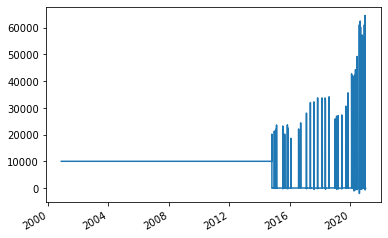

In [22]:
df['ending_cash'].plot();

C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


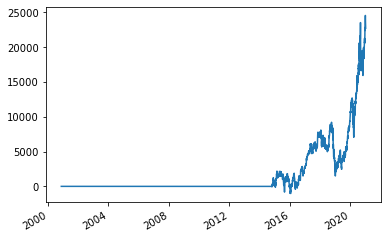

In [23]:
df['pnl'].plot();